# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [26]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

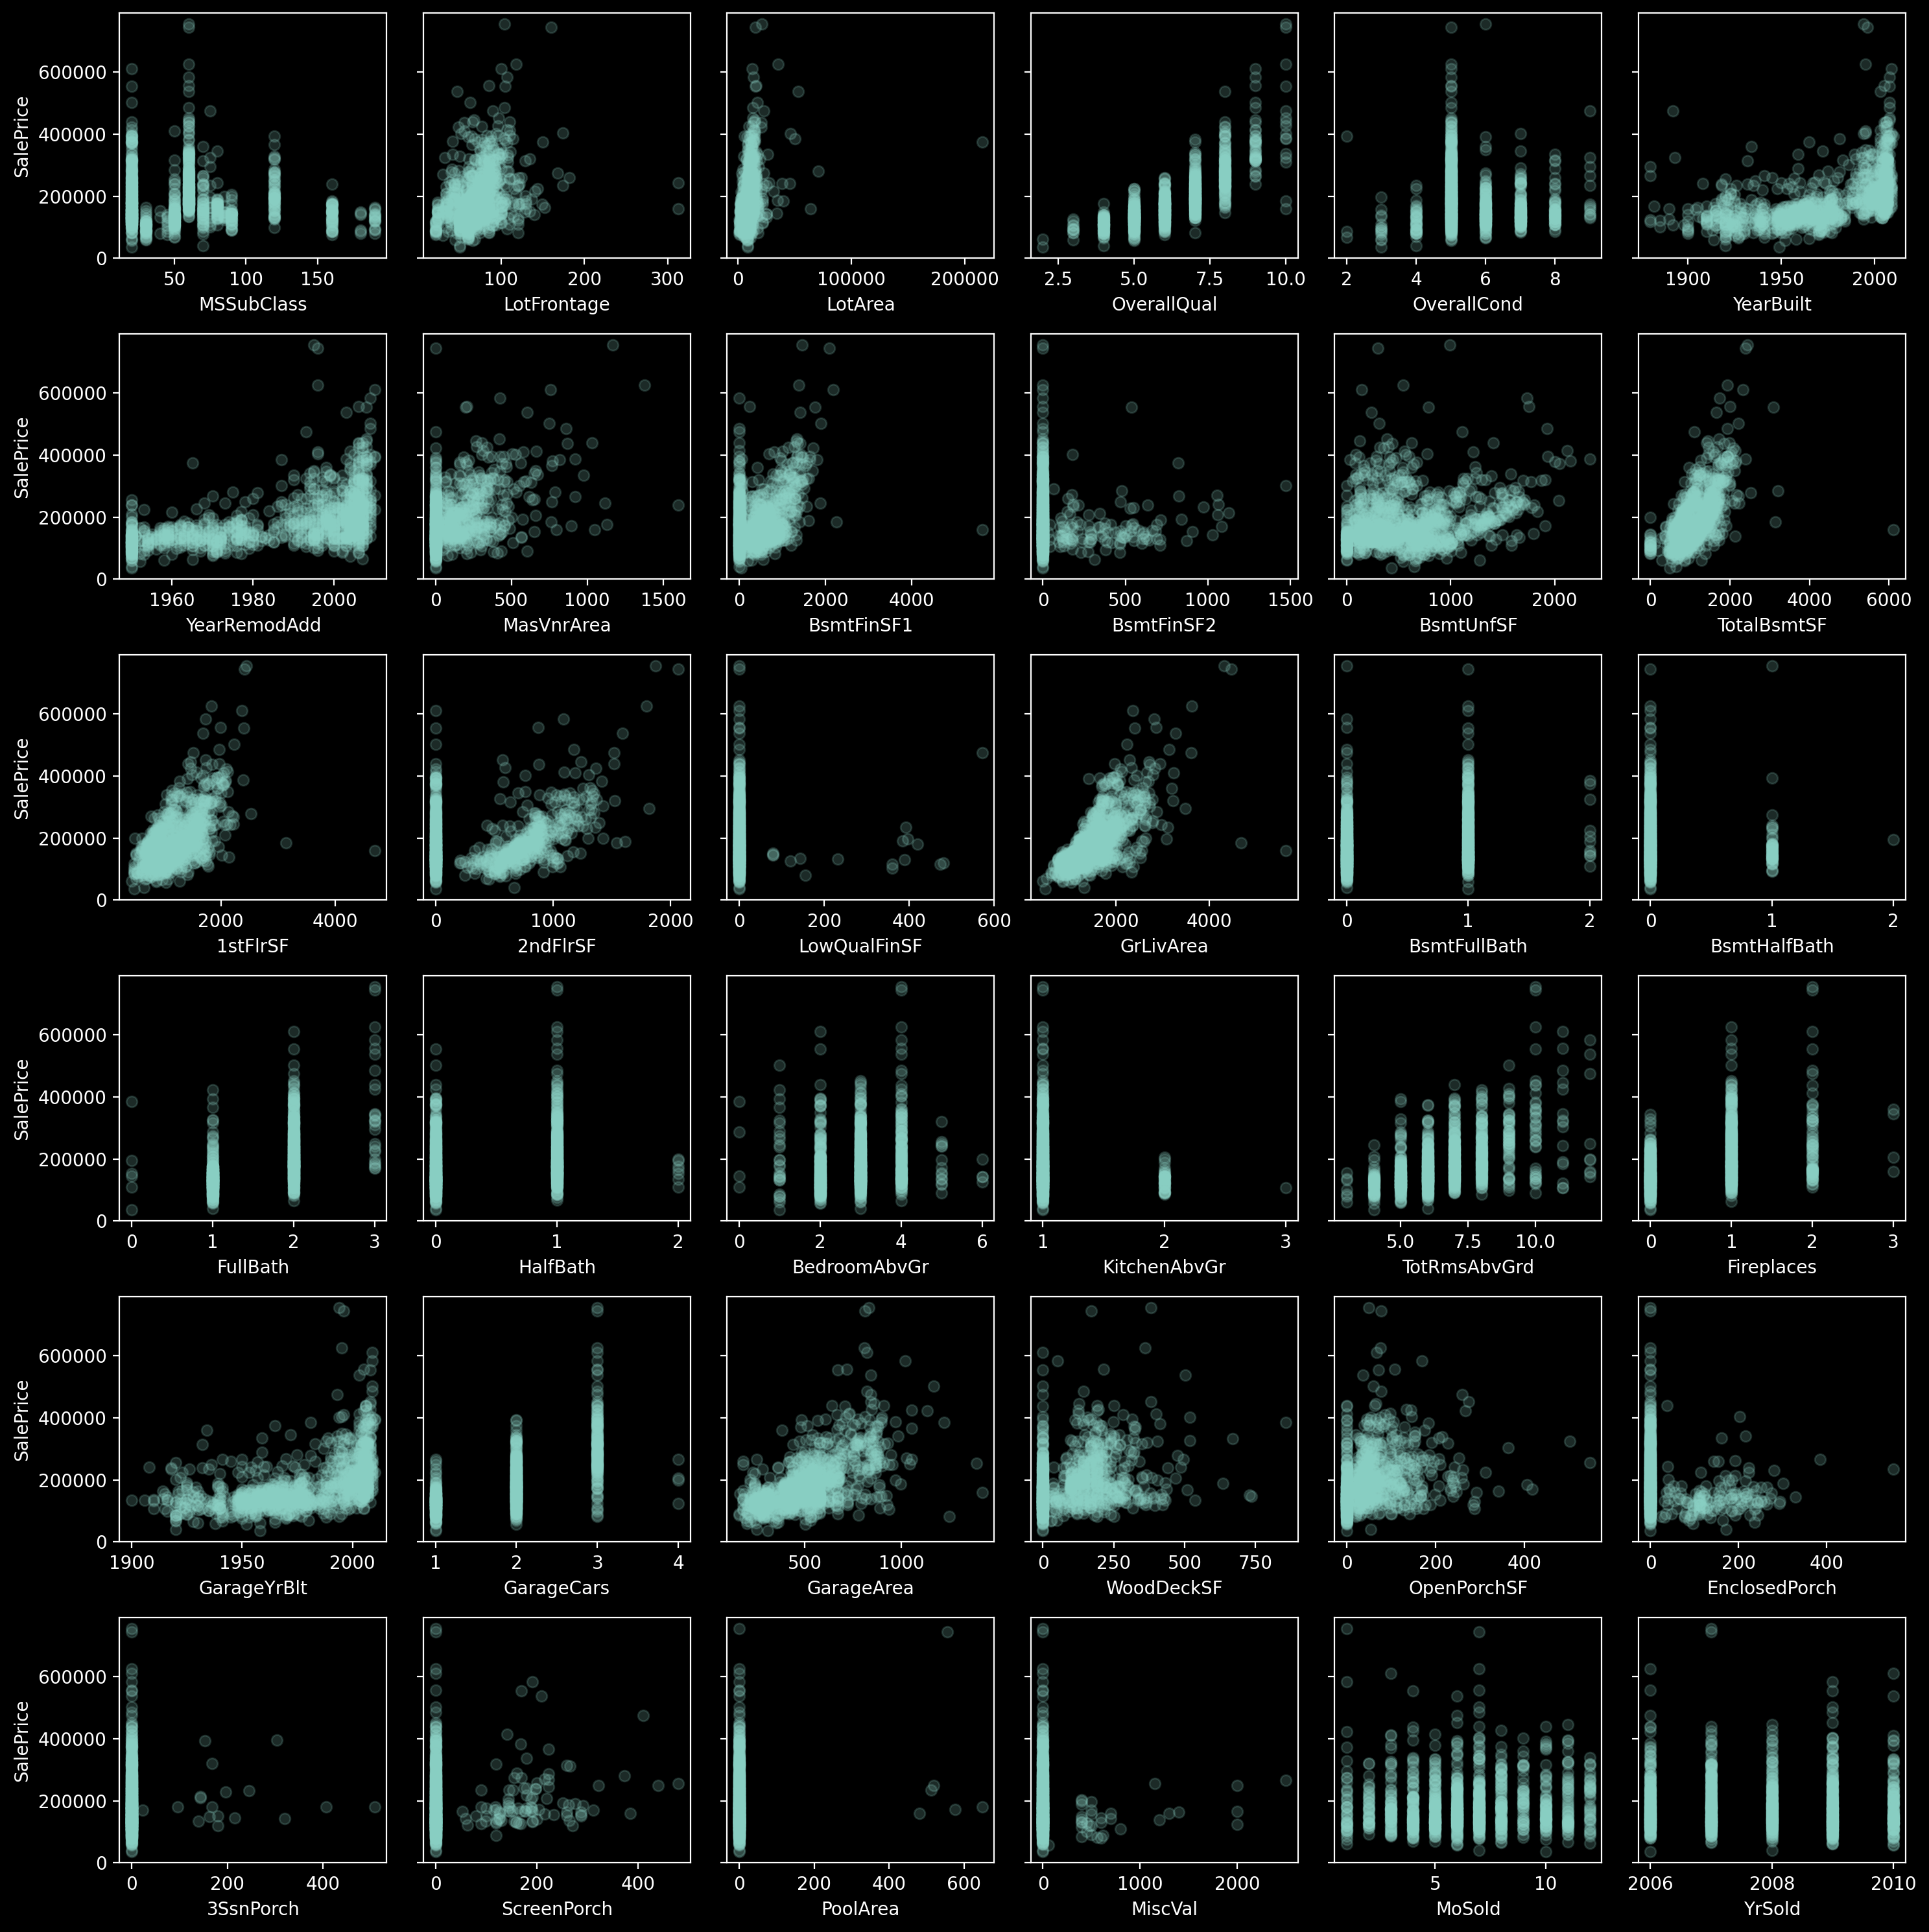

In [27]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [28]:
# Your written answer here
"""
LotFrontage, GrLivArea, YrRemodAdd
"""

'\nLotFrontage, GrLivArea, YrRemodAdd\n'

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

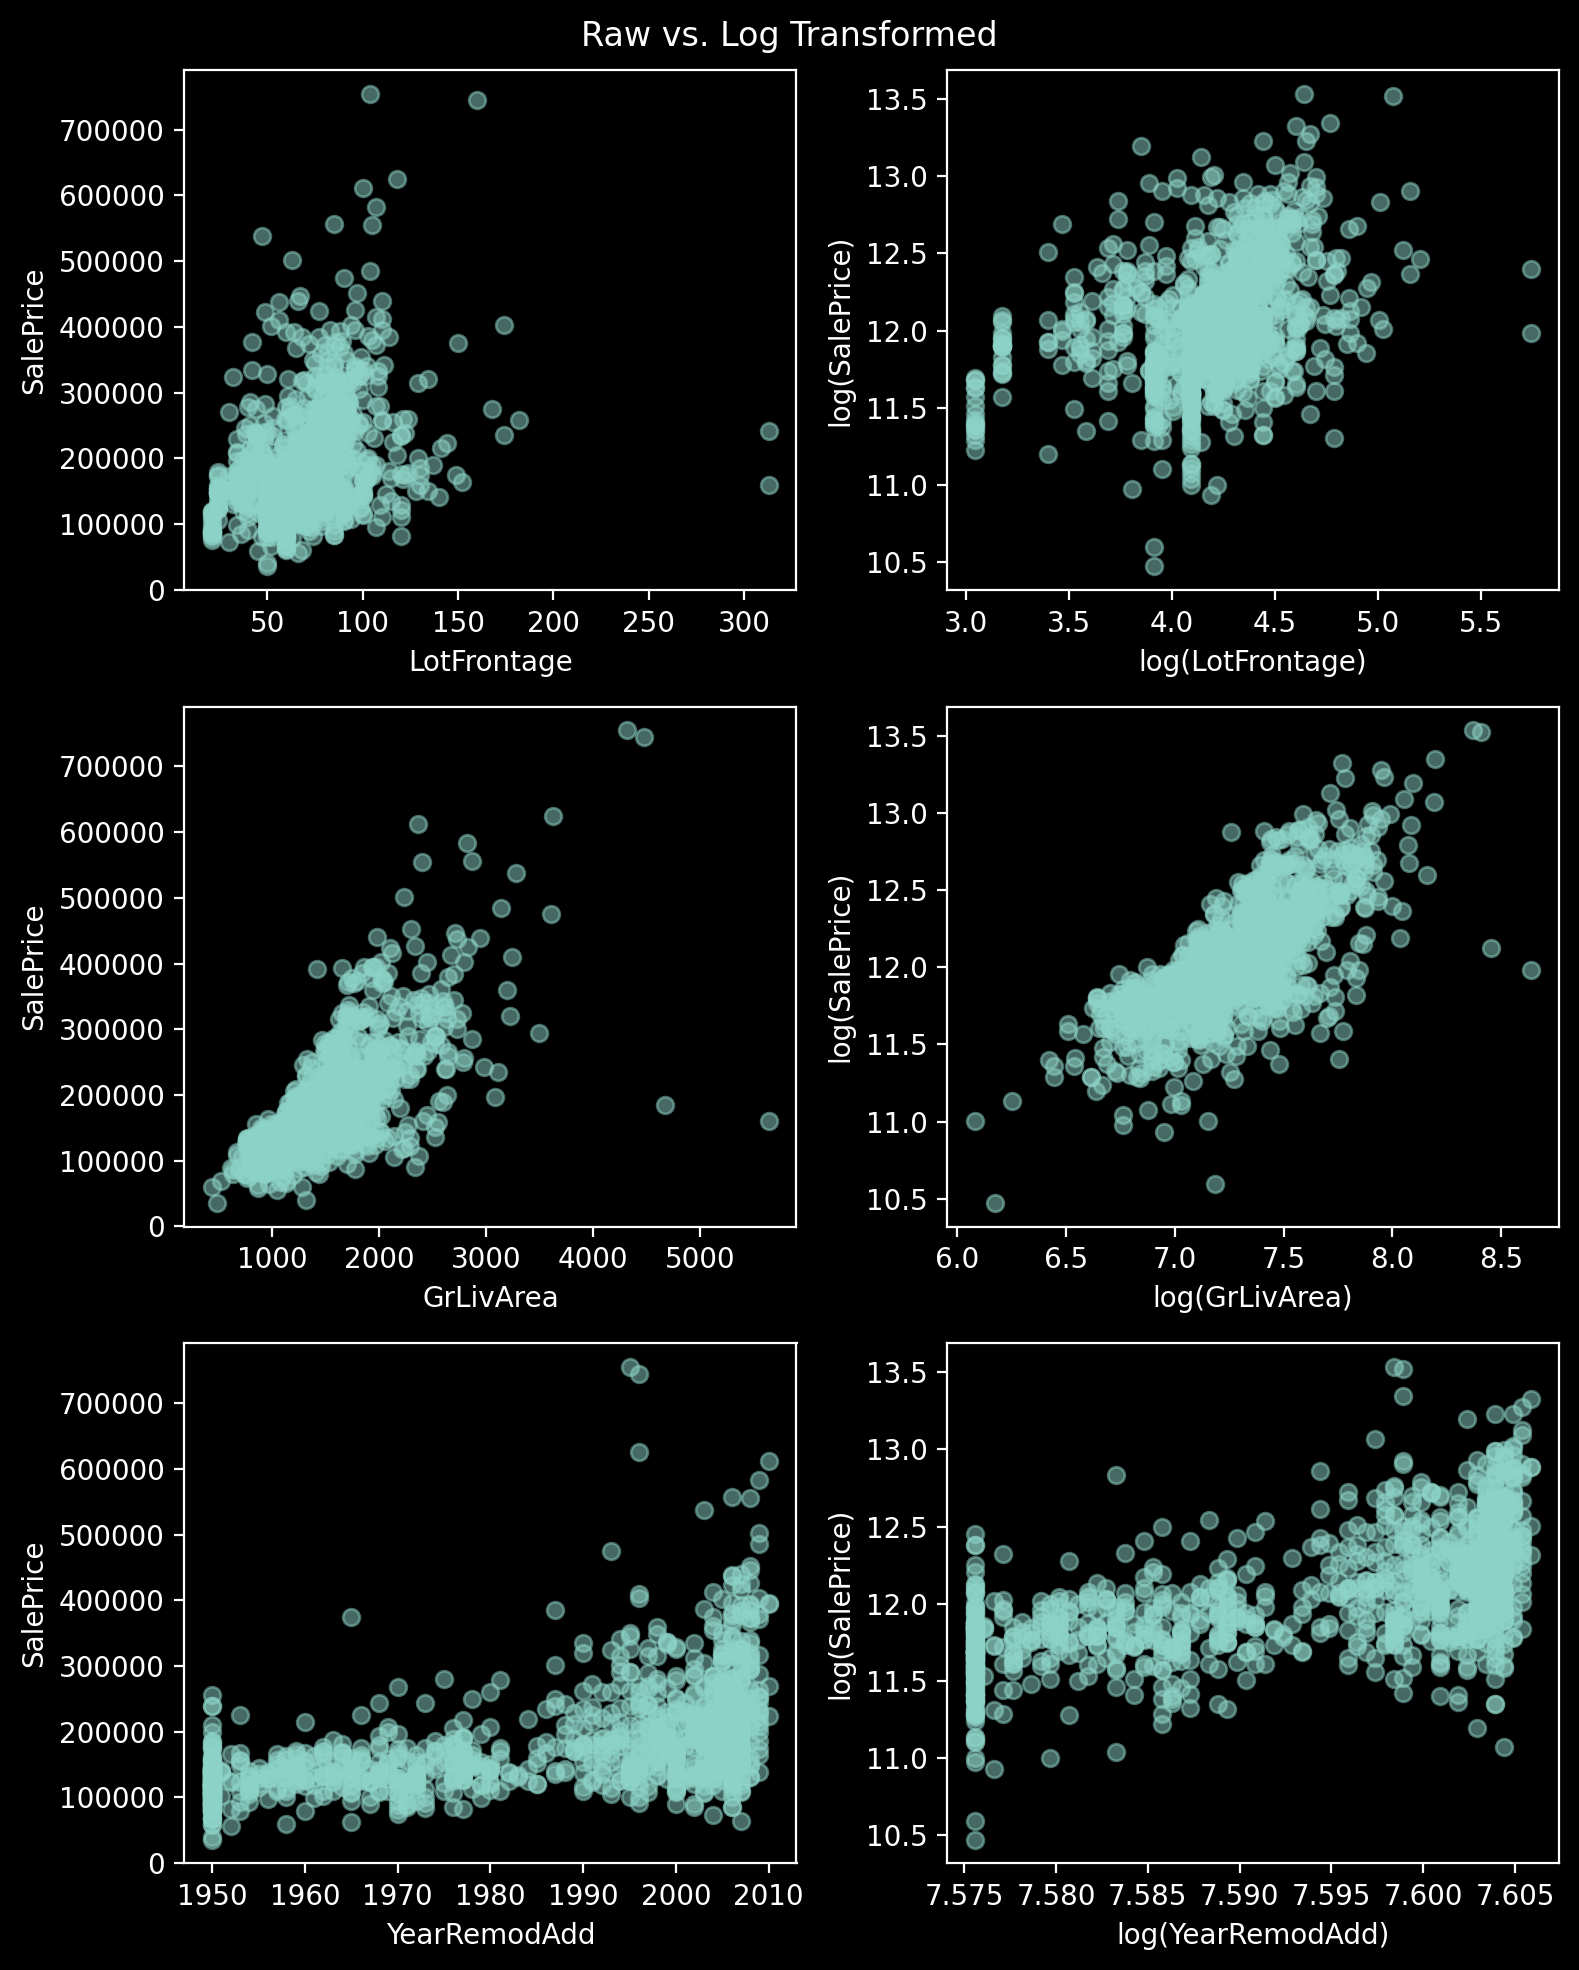

In [29]:
# Your code here
import numpy as np
candidates = ["LotFrontage", "GrLivArea", "YearRemodAdd"]

fig, axes = plt.subplots(ncols=2, nrows=len(candidates), figsize=(8,10))

for i, column in enumerate(candidates):
    # Plot raw version
    left_ax = axes[i][0]
    left_ax.scatter(ames[column], y, alpha=0.5)
    left_ax.set_xlabel(column)
    left_ax.set_ylabel("SalePrice")
    
    # Plot log transformed version
    right_ax = axes[i][1]
    right_ax.scatter(np.log(ames[column]), np.log(y), alpha=0.5)
    right_ax.set_xlabel(f"log({column})")
    right_ax.set_ylabel("log(SalePrice)")
    
fig.suptitle("Raw vs. Log Transformed")

fig.tight_layout()

Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [30]:
# Your code here - prepare data for modeling
# We are going to use all 3 of the candidates graphed above
X_log = X[candidates].copy()

X_log.describe()

,LotFrontage,GrLivArea,YearRemodAdd
count,1121.000000,1121.000000,1121.000000
mean,70.665477,1531.411240,1985.683318
std,24.266812,523.723899,21.025974
min,21.000000,438.000000,1950.000000
25%,60.000000,1155.000000,1966.000000
50%,70.000000,1479.000000,1995.000000
75%,80.000000,1776.000000,2005.000000
max,313.000000,5642.000000,2010.000000


In [31]:
# We are going to use all 3 of the candidates graphed above
X_log["YearRemodAdd"] = X_log["YearRemodAdd"] - 1910
X_log.describe()

,LotFrontage,GrLivArea,YearRemodAdd
count,1121.000000,1121.000000,1121.000000
mean,70.665477,1531.411240,75.683318
std,24.266812,523.723899,21.025974
min,21.000000,438.000000,40.000000
25%,60.000000,1155.000000,56.000000
50%,70.000000,1479.000000,85.000000
75%,80.000000,1776.000000,95.000000
max,313.000000,5642.000000,100.000000


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [32]:
# Go through and log transform all columns
for column in X_log.columns:
    X_log[f"log_{column}"] = np.log(X_log[column])
    X_log.drop(column, axis=1, inplace=True)
    
X_log

,log_LotFrontage,log_GrLivArea,log_YearRemodAdd
Id,,,
1,4.174387,7.444249,4.532599
2,4.382027,7.140453,4.189655
3,4.219508,7.487734,4.521789
4,4.094345,7.448334,4.094345
5,4.430817,7.695303,4.499810
...,...,...,...
1456,4.127134,7.406711,4.499810
1457,4.442651,7.636752,4.356709
1458,4.189655,7.757906,4.564348


In [33]:
y_log = np.log(y)
y_log.name = "log_SalePrice"
y_log

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: log_SalePrice, Length: 1121, dtype: float64

In [34]:
# Your code here - build a model
import statsmodels.api as sm
y = ames['SalePrice']

model = sm.OLS(y_log, sm.add_constant(X_log))
results = model.fit()

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [35]:
# Your code here - evaluate the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     820.6
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          8.34e-282
Time:                        19:38:15   Log-Likelihood:                 98.731
No. Observations:                1121   AIC:                            -189.5
Df Residuals:                    1117   BIC:                            -169.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2715      0.160  

In [36]:
"""
The model explained about 69% of the variance in SalePrice

All coefficients were statistically significant

For each increase of 1% in lot frontage, we see an associated increase
of about 0.2% in sale price

For each increase of 1% in above-grade living area, we see an associated
increase of about 0.7% in sale price

For each increase of 1 year since 1910 in remodel year, we see an
associated increase of about 0.5% in sale price
"""

'\nThe model explained about 69% of the variance in SalePrice\n\nAll coefficients were statistically significant\n\nFor each increase of 1% in lot frontage, we see an associated increase\nof about 0.2% in sale price\n\nFor each increase of 1% in above-grade living area, we see an associated\nincrease of about 0.7% in sale price\n\nFor each increase of 1 year since 1910 in remodel year, we see an\nassociated increase of about 0.5% in sale price\n'

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.